In [2]:
import sys
import numpy as np
import pandas as pd
%matplotlib inline
from matplotlib import pyplot as plt
import sklearn
import pandas as pd
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

In [5]:
filename = "enuresis_1.sav"
df = pd.read_spss(r"C:\Users\surface\Desktop\Python\enuresis_1.sav")
df.head()

,Patientage,voidpattern,timetoqmax,fcapacity,fcap.volume,fcap.volume.group,voidetime,Qmax,PVR,PVR.volume,stabilitydetrusor,ccapacity,cys.capa.volume,cystometric.cap.volume.group,compliance,complaint,Bsensation,void,dcontraction,PFS
0,15.0,Bell,Decreased,normal,151.0,2.0,decreased,Increased,normal,86.0,normal,normal,291.0,2.0,Normal,Enuresis,normal,Voluntary,normal,Normal
1,15.0,Bell,Decreased,normal,151.0,2.0,decreased,Increased,normal,86.0,normal,normal,291.0,2.0,Normal,Enuresis,normal,Voluntary,normal,Normal
2,15.0,Bell,Decreased,Increased,162.0,2.0,decreased,Increased,Increased,14.0,OAD-G3,normal,351.0,2.0,Normal,Enuresis+ Incontinency,Early,Voluntary,normal,Normal
3,15.0,Bell,Decreased,Increased,162.0,2.0,decreased,Increased,Increased,14.0,OAD-G3,normal,351.0,2.0,Normal,Enuresis+ Incontinency,Early,Voluntary,normal,Normal
4,15.0,Bell,normal,normal,304.0,3.0,decreased,Normal,Increased,205.0,normal,normal,368.0,2.0,Normal,Enuresis,Early,Voluntary,normal,Normal


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 596 entries, 0 to 595
Data columns (total 20 columns):
 #   Column                        Non-Null Count  Dtype   
---  ------                        --------------  -----   
 0   Patientage                    596 non-null    float64 
 1   voidpattern                   596 non-null    category
 2   timetoqmax                    596 non-null    category
 3   fcapacity                     596 non-null    category
 4   fcap.volume                   596 non-null    float64 
 5   fcap.volume.group             596 non-null    float64 
 6   voidetime                     596 non-null    category
 7   Qmax                          596 non-null    category
 8   PVR                           596 non-null    category
 9   PVR.volume                    596 non-null    float64 
 10  stabilitydetrusor             596 non-null    category
 11  ccapacity                     596 non-null    category
 12  cys.capa.volume               596 non-null    floa

In [6]:
df.describe()

,Patientage,fcap.volume,fcap.volume.group,PVR.volume,cys.capa.volume,cystometric.cap.volume.group
count,596.000000,596.000000,596.000000,596.000000,596.000000,596.000000
mean,22.322148,435.476510,2.986577,112.687919,406.073826,2.124161
std,5.068629,255.491948,0.959598,161.715114,179.814978,0.783026
min,15.000000,44.000000,1.000000,0.000000,69.000000,1.000000
25%,19.000000,237.000000,2.000000,15.000000,286.000000,2.000000
50%,21.000000,383.000000,3.000000,60.000000,375.500000,2.000000
75%,24.000000,589.000000,4.000000,128.000000,490.000000,2.000000
max,45.000000,1508.000000,4.000000,977.000000,1024.000000,4.000000


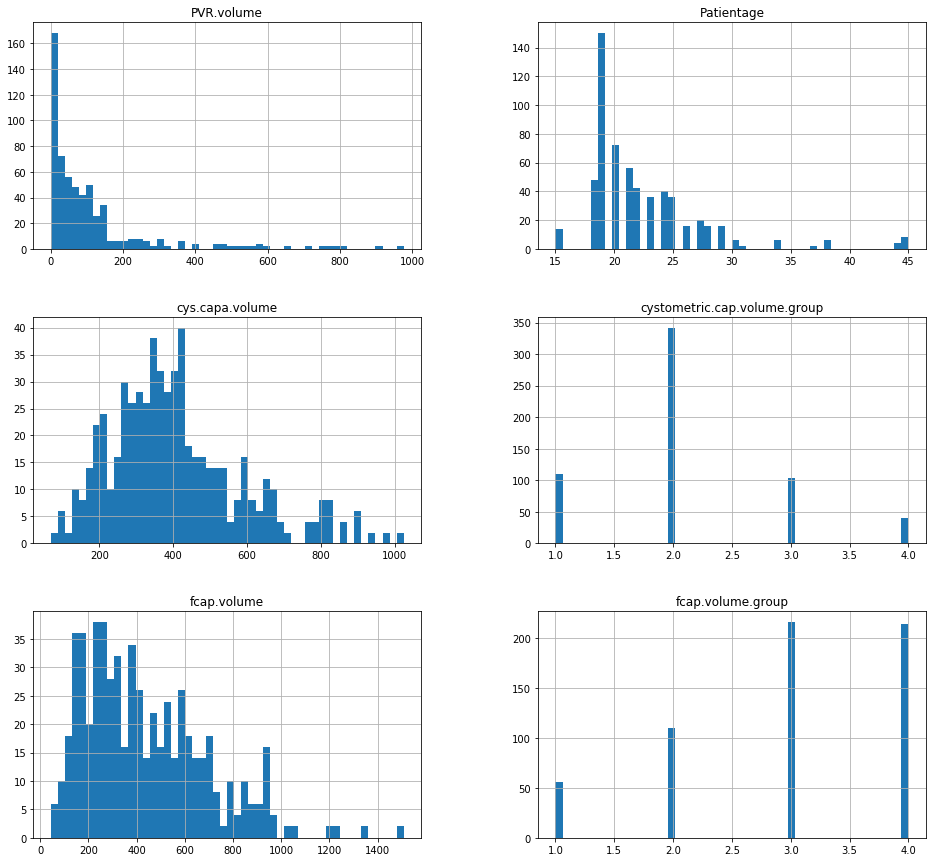

In [13]:
df.hist(bins=50, figsize=(16,15))
plt.show()

In [14]:
df.corr()

,Patientage,fcap.volume,fcap.volume.group,PVR.volume,cys.capa.volume,cystometric.cap.volume.group
Patientage,1.000000,0.042538,0.044429,0.122627,-0.014690,-0.012636
fcap.volume,0.042538,1.000000,0.838397,0.260298,0.354570,0.329963
fcap.volume.group,0.044429,0.838397,1.000000,0.228472,0.275965,0.252738
PVR.volume,0.122627,0.260298,0.228472,1.000000,0.119491,0.129104
cys.capa.volume,-0.014690,0.354570,0.275965,0.119491,1.000000,0.938463
cystometric.cap.volume.group,-0.012636,0.329963,0.252738,0.129104,0.938463,1.000000


In [62]:
from sklearn.preprocessing import LabelBinarizer # you can use "sparse_output=True" in LabelBinarizer to get sparse matrix

voidpattern_cat = df["voidpattern"]
voidpattern_cat_1hot = LabelBinarizer().fit_transform(voidpattern_cat)

timetoqmax _cat = df["timetoqmax "]
timetoqmax _cat_1hot = LabelBinarizer().fit_transform(timetoqmax _cat)

fcapacity_cat = df["fcapacity"]
fcapacity_cat_1hot = LabelBinarizer().fit_transform(fcapacity_cat)

fcap.volume _cat = df["fcap.volume "]
fcap.volume _cat_1hot = LabelBinarizer().fit_transform(fcap.volume _cat)

fcap.volume.group_cat = df["fcap.volume.group"]
fcap.volume.group_cat_1hot = LabelBinarizer().fit_transform(fcap.volume.group_cat)


voidpattern_cat = df["voidpattern"]
voidpattern_cat_1hot = LabelBinarizer().fit_transform(voidpattern_cat)


voidpattern_cat = df["voidpattern"]
voidpattern_cat_1hot = LabelBinarizer().fit_transform(voidpattern_cat)


voidpattern_cat = df["voidpattern"]
voidpattern_cat_1hot = LabelBinarizer().fit_transform(voidpattern_cat)


voidpattern_cat = df["voidpattern"]
voidpattern_cat_1hot = LabelBinarizer().fit_transform(voidpattern_cat)



voidpattern_cat = df["voidpattern"]
voidpattern_cat_1hot = LabelBinarizer().fit_transform(voidpattern_cat)

array([[1, 0, 0, 0],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       ...,
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       [1, 0, 0, 0]])